## INSTRUCTIONS - IMPORTANT:

Every student is expected to submit their own, original solutions for this assignment. While collaborative discussions among classmates are encouraged for better understanding, it is crucial that the work you submit is your own. Copying or replicating someone else's solutions is a breach of academic integrity and will not be tolerated. The use of **AI tools** is also **prohibited** for this assignment.

The dataset used in this assignment is derived from Inside Airbnb, available [here](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-06-05/visualisations/listings.csv). It is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

**Please note that this dataset has been modified and adapted for the scope of this academic assignment. If you are interested in the original data or further Airbnb datasets, we encourage you to visit Inside Airbnb's website: [insideairbnb.com](http://insideairbnb.com).**


<h3> This assignment is divided into two main components: </h3>

1. **Data Manipulation**: Focused on cleaning and preparing the dataset.
2. **Exploratory Data Analysis (EDA)**: Concentrated on analyzing and interpreting the data.

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("airbnb_final.csv")

In [3]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [4]:
#Code goes here
df.shape

(7608, 15)

### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [5]:
# 1.2.1 Code to identify data types goes here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   host_id           7602 non-null   float64
 1   neighbourhood     7608 non-null   object 
 2   latitude          7604 non-null   float64
 3   longitude         7602 non-null   float64
 4   room_type         7608 non-null   object 
 5   price in $        7598 non-null   float64
 6   minimum_nights    7599 non-null   float64
 7   availability_365  7607 non-null   float64
 8   Apartment_type    7607 non-null   object 
 9   City              7607 non-null   object 
 10  Rating            6030 non-null   float64
 11  No_of_bed_rooms   7324 non-null   float64
 12  No_of_beds        7591 non-null   float64
 13  No_of_bathrooms   6804 non-null   float64
 14  Bathroom_type     7607 non-null   object 
dtypes: float64(10), object(5)
memory usage: 891.7+ KB


In [6]:
# 1.2.3 change the host_id column to an integer
df["host_id"] = df["host_id"].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   host_id           7608 non-null   int64  
 1   neighbourhood     7608 non-null   object 
 2   latitude          7604 non-null   float64
 3   longitude         7602 non-null   float64
 4   room_type         7608 non-null   object 
 5   price in $        7598 non-null   float64
 6   minimum_nights    7599 non-null   float64
 7   availability_365  7607 non-null   float64
 8   Apartment_type    7607 non-null   object 
 9   City              7607 non-null   object 
 10  Rating            6030 non-null   float64
 11  No_of_bed_rooms   7324 non-null   float64
 12  No_of_beds        7591 non-null   float64
 13  No_of_bathrooms   6804 non-null   float64
 14  Bathroom_type     7607 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 891.7+ KB


### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [7]:
# 1.3.1 check for duplicate values

print(df.duplicated().value_counts())
df.duplicated()



False    7608
Name: count, dtype: int64


0       False
1       False
2       False
3       False
4       False
        ...  
7603    False
7604    False
7605    False
7606    False
7607    False
Length: 7608, dtype: bool

### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [8]:
# 1.4.1 check for missing values
df.isnull().sum()

host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64

In [9]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
df["price in $"]= df["price in $"].fillna(df["price in $"].dropna().mean())



In [10]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
df.isnull().sum()

host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $             0
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64

In [11]:
df["City"].unique()

array(['Amsterdam', nan], dtype=object)

Before replacing the null value in "City" column, We need to check the unique data "City" column contains. As "City" column only contains "Amsterdam" string, We will replace one missing record in "City" column with "Amsterdam" string.

In [12]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df["City"] = df["City"].fillna(value="Amsterdam")

In [13]:
# 1.4.6 Verify that there are no more missing values in the 'City' column
df["City"].isnull().sum()

0

In [14]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2 = df.dropna()
df2.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private


### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [15]:
# 1.5.1 code to show shapes of old and new dataframes
print("Shape of original dataframe df: ", df.shape)
print("Shape of new dataframe after dropping records with missing values df2: ", df2.shape)

Shape of original dataframe df:  (7608, 15)
Shape of new dataframe after dropping records with missing values df2:  (5108, 15)


- After comparision, we found that 7608 - 5104 = 2504 records were dropped from original dataframe. 

In [16]:
# 1.5.2 Code to verify no missing values
df2.isnull().sum()

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

- We can see in the result above, no field contains missing value.  

### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

Note: from here forward, work with the df2 DataFrame.

In [17]:
# 1.6.1 Code goes here
df2 = df2.drop(columns=["latitude", "longitude"])

In [18]:
# 1.6.2 Show new shape
df2.shape

(5108, 13)

- After dropping latitude and longitude, we see that shape changed from (5104, 15) to (5104, 13).

### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [19]:
# 1.7.1 Find and list the unique apartment tpyes.
print("Unique values present in 'Apartment_type' column are listed below: \n", df2["Apartment_type"].unique())


Unique values present in 'Apartment_type' column are listed below: 
 ['Condo' 'Rental unit' 'Houseboat' 'Boutique hotel' 'Guest suite' 'Home'
 'Loft' 'Boat' 'Bed and breakfast' 'Townhouse' 'Chalet' 'Guesthouse'
 'Farm stay' 'Serviced apartment' 'Barn' 'Hotel' 'Cabin' 'Villa'
 'Place to stay' 'Tiny home' 'Cottage' 'Nature lodge' 'Tower' 'Hostel'
 'Aparthotel' 'Camper/RV' 'Earthen home' 'casa particular' 'Vacation home'
 'Tent']


In [20]:
# 1.7.2 Find and list the unique bathroom types.
print("Unique values present in 'Bathroom_type' column are listed below: \n", df2["Bathroom_type"].unique())

df2["Bathroom_type"].unique().tolist()

Unique values present in 'Bathroom_type' column are listed below: 
 ['shared' 'private']


['shared', 'private']

### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [21]:
# 1.8.1 Replace the strings with integers
df2["Bathroom_type"] = df2["Bathroom_type"].map(arg= {"shared": 0, "private": 1})

In [22]:
# 1.8.2 Verify the changes
df2["Bathroom_type"].unique()

array([0, 1])

# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

### 2.1. **Describe the data.**

In [23]:
# Describe data here.
df2.describe()

,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
count,5.108000e+03,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,8.957354e+07,250.071427,5.344949,68.873727,4.828872,1.615114,1.615114,1.316856,0.904268
std,1.283283e+08,239.576562,40.127865,100.861524,0.214108,0.891545,0.891545,0.467762,0.294252
min,0.000000e+00,18.000000,1.000000,0.000000,1.670000,1.000000,1.000000,0.000000,0.000000
25%,8.946164e+06,149.000000,2.000000,0.000000,4.750000,1.000000,1.000000,1.000000,1.000000
50%,2.942286e+07,205.500000,3.000000,12.000000,4.890000,1.000000,1.000000,1.000000,1.000000
75%,1.051994e+08,300.000000,4.000000,114.000000,5.000000,2.000000,2.000000,1.500000,1.000000
max,5.126757e+08,10000.000000,1001.000000,365.000000,5.000000,10.000000,10.000000,5.500000,1.000000


### 2.2. **Identify significant correlations.**

In [24]:
# 2.2.1 Build the correlation matrix
df2.corr("pearson", numeric_only= True)

,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
host_id,1.000000,0.042410,-0.009971,0.165185,-0.164723,-0.071205,-0.071205,-0.046735,-0.066510
price in $,0.042410,1.000000,-0.003072,0.171706,0.045040,0.292805,0.292805,0.266971,0.171660
minimum_nights,-0.009971,-0.003072,1.000000,0.011592,0.011779,0.005830,0.005830,-0.004859,0.002631
availability_365,0.165185,0.171706,0.011592,1.000000,-0.167042,-0.065623,-0.065623,-0.028057,-0.178860
Rating,-0.164723,0.045040,0.011779,-0.167042,1.000000,0.035783,0.035783,0.072711,0.174168
No_of_bed_rooms,-0.071205,0.292805,0.005830,-0.065623,0.035783,1.000000,1.000000,0.475608,0.188682
No_of_beds,-0.071205,0.292805,0.005830,-0.065623,0.035783,1.000000,1.000000,0.475608,0.188682
No_of_bathrooms,-0.046735,0.266971,-0.004859,-0.028057,0.072711,0.475608,0.475608,1.000000,0.102347
Bathroom_type,-0.066510,0.171660,0.002631,-0.178860,0.174168,0.188682,0.188682,0.102347,1.000000


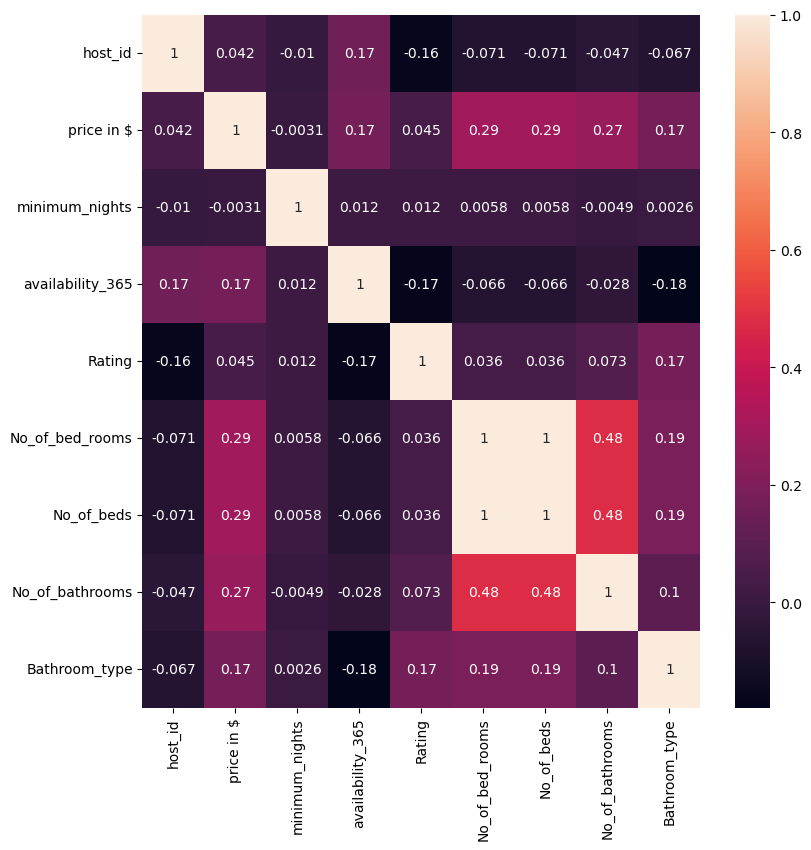

In [25]:
# 2.2.2 Display the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df2.corr("pearson", numeric_only= True), annot= True)
plt.show()

### 2.3. **Check if is there any multicollinearity.**

In [26]:
#Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [27]:
# 2.3.1 Select all numerical columns *except* host_id.
numericDf = df2.select_dtypes('number').drop(columns="host_id")
numericDf.head()


,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,69.0,3.0,7.0,4.89,1.0,1.0,1.5,0
2,270.0,4.0,2.0,4.86,3.0,3.0,1.5,1
3,200.0,3.0,0.0,4.76,1.0,1.0,1.5,1
4,137.0,3.0,0.0,4.94,1.0,1.0,1.5,1
5,170.0,3.0,157.0,4.77,1.0,1.0,1.0,1


In [28]:
# 2.3.2 Make sure there are no missing (NaN) values 
numericDf.isnull().sum()

price in $          0
minimum_nights      0
availability_365    0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

- We can see on the above result that there is no missing values in our data. 

In [29]:
# 2.3.3 Add a constant column for the VIF calculation
dfWithConst = sm.add_constant(numericDf)
dfWithConst.head()


,const,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,1.0,69.0,3.0,7.0,4.89,1.0,1.0,1.5,0
2,1.0,270.0,4.0,2.0,4.86,3.0,3.0,1.5,1
3,1.0,200.0,3.0,0.0,4.76,1.0,1.0,1.5,1
4,1.0,137.0,3.0,0.0,4.94,1.0,1.0,1.5,1
5,1.0,170.0,3.0,157.0,4.77,1.0,1.0,1.0,1


#### Below code is the calculation of VIF without using statsmodel package. This is done for the understanding of VIF. How it is implemented.

In [30]:

# names = dfWithConst.columns
# for i in range(0, dfWithConst.shape[1]):
#     y = dfWithConst.iloc[:, i]
#     x = dfWithConst.drop(dfWithConst.columns[i], axis=1)
#     model = sm.OLS(y, x)
#     results = model.fit()
#     rsq = results.rsquared
#     vif = (1 / (1 - rsq), 2)
#     print(
#         "R Square value of {} column is {} keeping all other columns as features".format(
#             names[i], (round(rsq, 2))
#         )
#     )
#     print(
#         "Variance Inflation Factor of {} column is {} \n".format(
#             names[i], vif)
#         )

In [31]:
# 2.3.4 Calculate the VIF for each of the columns and display the information.(Make E.C.?)
names = dfWithConst.columns
vifCalculated = pd.DataFrame(data= {"Feature": names})
vifCalculated["VIF"] = [variance_inflation_factor(dfWithConst.values, i) for i in range(dfWithConst.shape[1])]
vifCalculated

/home/buddha-thapa-magar/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,const,534.320122
1,price in $,1.201058
2,minimum_nights,1.000520
3,availability_365,1.114930
4,Rating,1.058086
5,No_of_bed_rooms,inf
6,No_of_beds,inf
7,No_of_bathrooms,1.328305
8,Bathroom_type,1.118485


### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

<Axes: xlabel='price in $'>

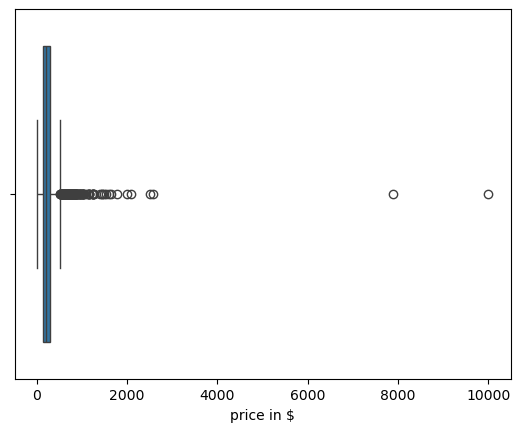

In [32]:
# 2.4.1. Show boxplot of price in $ 
sns.boxplot(data= df2, x = "price in $")

In [33]:
# 2.4.2 Show the maximum price in $
df2["price in $"].max()

10000.0

- 10000 is the maximum price for the airbnb.

1001.0


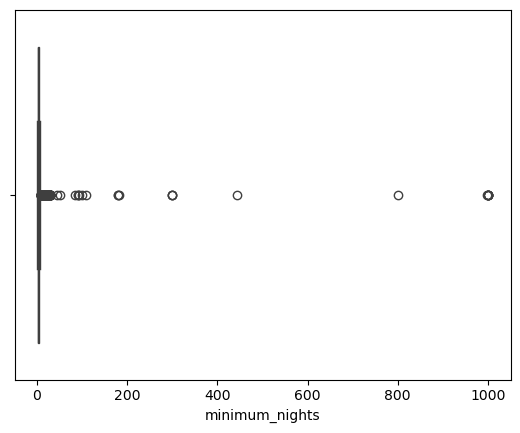

In [34]:
# 2.4.3 Show a boxplot for minimum_nights
print(df["minimum_nights"].max())
sns.boxplot(data= df2, x= "minimum_nights")
plt.show()

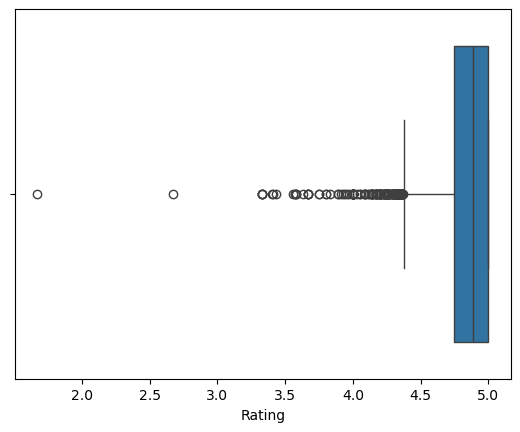

In [35]:
# 2.4.4 Show a boxplot for Rating
sns.boxplot(data= df2, x= "Rating")
plt.show()

In [36]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.
def FindOutlierRecordsBasedOnColumn(dataFrame: pd.DataFrame, columnToCalculateOutlier):
    if(not pd.api.types.is_numeric_dtype(dataFrame[columnToCalculateOutlier])):
        raise ValueError("Column must contains numeric values only.")
    quartile1 = dataFrame[columnToCalculateOutlier].quantile(0.25)
    quartile3 = dataFrame[columnToCalculateOutlier].quantile(0.75)
    interQuartileRange = quartile3 - quartile1
    lowerLimit = quartile1 - 1.5* interQuartileRange
    upperLimit = quartile3 +1.5*interQuartileRange
    return dataFrame[(dataFrame[columnToCalculateOutlier] <= lowerLimit) | (dataFrame[columnToCalculateOutlier] >= upperLimit)].index
    
    
def dropOutlierBasedOnColumn(dataFrame: pd.DataFrame, columnToCalculateOutlier):
    return dataFrame.loc[df2.index.difference(FindOutlierRecordsBasedOnColumn(df2, "price in $"))]

#Testing
dropOutlierBasedOnColumn(df2, "price in $").shape

(4876, 13)

In [37]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)

print("Outliers values in 'price in $' column: \n", df2["price in $"].loc[FindOutlierRecordsBasedOnColumn(df2, "price in $")].tolist())
print("\nOutliers values in 'minimum_nights' column: \n", df2["minimum_nights"].loc[FindOutlierRecordsBasedOnColumn(df2, "minimum_nights")].tolist())
print("\nOutliers values in 'Rating' column: \n", df2["Rating"].loc[FindOutlierRecordsBasedOnColumn(df2, "Rating")].tolist())

Outliers values in 'price in $' column: 
 [675.0, 1036.0, 1239.0, 800.0, 614.0, 950.0, 970.0, 636.0, 1129.0, 650.0, 550.0, 650.0, 730.0, 600.0, 10000.0, 670.0, 1100.0, 879.0, 575.0, 1150.0, 857.0, 636.0, 550.0, 607.0, 629.0, 675.0, 571.0, 900.0, 542.0, 529.0, 550.0, 733.0, 578.0, 695.0, 800.0, 539.0, 552.0, 599.0, 601.0, 535.0, 1160.0, 747.0, 563.0, 700.0, 599.0, 579.0, 900.0, 1024.0, 1790.0, 600.0, 529.0, 550.0, 600.0, 600.0, 562.0, 1000.0, 800.0, 812.0, 2575.0, 733.0, 557.0, 747.0, 543.0, 936.0, 643.0, 550.0, 595.0, 650.0, 540.0, 557.0, 1250.0, 900.0, 613.0, 650.0, 1150.0, 950.0, 568.0, 600.0, 895.0, 857.0, 550.0, 570.0, 576.0, 578.0, 1600.0, 600.0, 749.0, 550.0, 535.0, 750.0, 536.0, 656.0, 750.0, 670.0, 536.0, 607.0, 750.0, 1150.0, 850.0, 600.0, 700.0, 695.0, 942.0, 567.0, 536.0, 591.0, 600.0, 714.0, 7900.0, 1246.0, 700.0, 626.0, 1457.0, 581.0, 550.0, 573.0, 1222.0, 1457.0, 564.0, 664.0, 679.0, 889.0, 1000.0, 530.0, 625.0, 850.0, 1500.0, 599.0, 628.0, 650.0, 535.0, 591.0, 700.0, 600

In [38]:
# 2.4.7 Display the count of outliers in each selected column


In [39]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.


In [40]:
# 2.4.9 Display the new count of outliers in each selected column


### 2.5. **Compute the Average Price for Each Type of Listing.**

In [41]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type


In [42]:
# 2.5.2 Plot and display the average price for each room type


### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [43]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'


In [44]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'


In [45]:
# 2.6.3. Find, Plot, and Display the top 10 most common apartment types


In [46]:
# 2.6.4 Find, Plot, and Display the bottom 5 least common apartment types

### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [47]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price


In [48]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods
